In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#fitur sklearn, dataset bodong
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [4]:
features=pd.DataFrame(data[0], columns=['x','y'])

In [5]:
target = pd.Series(data[1])

In [27]:
dataset = features.copy()

In [28]:
dataset['target']=target

In [29]:
dataset.head()

,x,y,target
0,-6.428841,10.141117,3
1,5.868679,5.201104,2
2,-0.376109,3.264279,0
3,2.166792,9.563005,2
4,5.095086,7.207527,2


# EDA

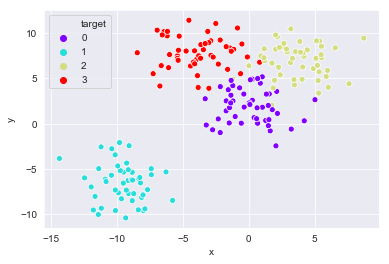

In [14]:
sns.set_style('darkgrid')
sns.scatterplot(data=dataset,x='x', y='y', hue='target', palette='rainbow' )

# Modelling

In [15]:
from sklearn.cluster import KMeans

In [18]:
model= KMeans(n_clusters=4)

In [19]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
cluster_model = model.labels_

In [22]:
dataset_model=features.copy()

In [23]:
dataset_model['target']=cluster_model

In [31]:
dataset_model.head()

,x,y,target
0,-6.428841,10.141117,3
1,5.868679,5.201104,2
2,-0.376109,3.264279,0
3,2.166792,9.563005,2
4,5.095086,7.207527,2


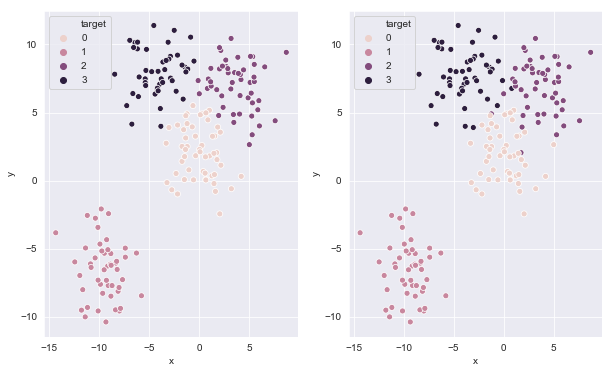

In [37]:
fig, ax= plt.subplots(1, 2,figsize=(10,6))
sns.scatterplot(data=dataset_model,x='x',y='y',hue='target',cmap='rainbow', ax=ax[0])
sns.scatterplot(data=dataset,x='x',y='y',hue='target', cmap='rainbow', ax=ax[1])

In [40]:
model.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

# Find the Best K

In [53]:
from yellowbrick.cluster import KElbowVisualizer

In [54]:
viz = KElbowVisualizer(KMeans(), k=(1,10))

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002017F90D1D0>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

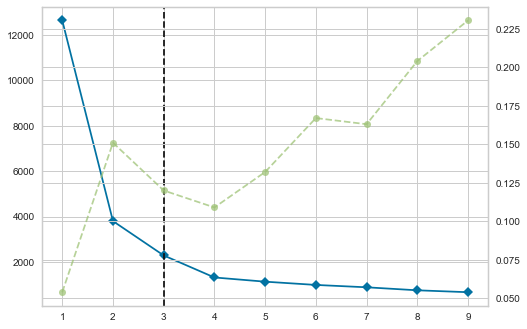

In [55]:
viz.fit(features)

# Cluster

In [45]:
model_k_3 = KMeans(n_clusters=3)

In [46]:
model_k_3.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
pd.Series(model_k_3.labels_).value_counts()

1    102
0     50
2     48
dtype: int64

In [49]:
pd.Series(model.labels_).value_counts()

0    54
2    50
1    50
3    46
dtype: int64

In [56]:
dataset_model_k_3=features.copy()

In [57]:
dataset_model_k_3['target']=model_k_3.labels_

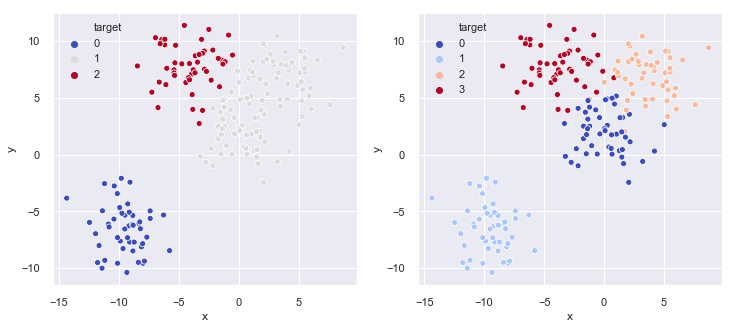

In [68]:
fig, ax= plt.subplots(1, 2,figsize=(12,5))
sns.scatterplot(data=dataset_model_k_3,x='x',y='y',hue='target',palette='coolwarm', ax=ax[0])
sns.scatterplot(data=dataset,x='x',y='y',hue='target', palette='coolwarm', ax=ax[1])
sns.set(style='darkgrid')